# CS579
### Logistic Regression

<br><br>
#### Illinois Institute of Technology  
#### Aron Culotta

<br><br><br><br><br>

Classification problem notation:


- $\vec{x} \in \mathcal{X}$ &nbsp;&nbsp;&nbsp;&nbsp; *instance*, *example*, *input*
  - e.g., an email, a sentence
  
- $y \in \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *target*, *class*, *label*, *output*
  - e.g., $y=1$: spam ; $y=-1$: not spam
  
- $f: \mathcal{X} \mapsto \mathcal{Y}$ &nbsp;&nbsp;&nbsp;&nbsp; *hypothesis*, *learner*, *model*, *classifier*
  - e.g., if $x$ contain the word *free*, $y$ is $1$.
  
  
Main quantity of interest: $p(y \mid \vec{x})$,  
the probability of a class label $y$ given a feature vector $\vec{x}$.

### Supervised classification

We are given **training data** $D = \{(\vec{x}_1, y_1), \ldots, (\vec{x}_n, y_n)\}$

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|

How to classify a new instance?  
 "free money" -> $\{1,1\}$



<u> How can we estimate</u> $p(y \mid \vec{x})$?

<br><br><br>

#### Function estimation

$p(y \mid \vec{x})$ is just a function $f(y, \vec{x})$ that satisfies three criteria:
1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$


How do we ensure criterion 3?
<br><br><br>

## Classification as a type of regression

Assume our function has some real-valued parameter vector $\vec{\theta} = \{\theta_1 \ldots \theta_k\}$

For simplicity, let's assume there are $k$ terms in our vocabulary, and that each $\theta$ is associated with a single term.

Further, let's assume binary classification, where $y \in \{-1, 1\}$.

One simple way to construct a function is as follows:

$f(\vec{x}, \vec{\theta}) = \sum_j x_j \theta_j = \vec{x} \cdot \vec{\theta}$  
where  
- $x_j$ is the frequency of term $j$ in this document.
- $\vec{x} \cdot \vec{\theta}$ is the dot product between vectors $\vec{x}$ and $\vec{\theta}$

To classify a document $\vec{x}$, we can then apply the rule:
- If $f(\vec{x}, \vec{\theta}) \ge 0$
  - output $1$
- else output $-1$

<br><br>
Thus,
- If $\theta_j >> 0$ , then term $j$ is associated with the positive class.  
- If $\theta_j << 0$ , then term $j$ is associated with the negative class.
<br><br><br>



In [1]:
from numpy import array as npa
import numpy as np

def f(x, theta):
    return np.dot(x.T, theta)

x = npa([1,2,3])  # term0 appears 1 time, term1 appears 2 times...
theta = npa([-1, -1, 5])  # term 2 predictive of positive class
f(x, theta)

12

In [2]:
# a negative example.
x2 = npa([10, 10, 0])
f(x2, theta)

-20

This can be understood as a type of regression task. To fit a regression function, we need to pick a model and an error function, then optimize the model parameters somehow. In machine learning, this is most commonly done with the gradient descent algorithm:

** Gradient descent recipe **

1.  Select a model type (e.g., linear, polynomial, etc)

2.  Select an <span>**error function**</span> that, when minimized, results in a good setting of the model parameters.

3.  Analytically determine the gradient of the error function with respect to the model parameters.

4.  Iteratively change the parameters by a small amount in the direction of the gradient until the (near) minimum of the error function is found.

<br><br><br>


## RSS

Given a labeled dataset $D = \{(y_1, \vec{x}_1) \ldots (y_n, \vec{x}_n)\}$ , an intuitive error function is called  
*Residual Sum of Squares*

$$
RSS(\vec{\theta}, D) = \frac{1}{2}\sum_{i=1}^{|D|}(y_i - f(\vec{x}_i, \vec{\theta}))^2
$$



In [3]:
def rss(theta, D):
    error = 0
    for xi, yi in D:
        prediction = f(xi, theta)
        errori = (yi - prediction)**2
        error += errori
        print('truth=%g  prediction=%g error=%g' %
              (yi, prediction, errori))
    return error / 2

||free|money| |*label*|
|:--:|:--------:|:--------:|:--:|:--:|
||$x_{i1}$|$x_{i2}$| | $y_i$ |
|$x_1$|0|0||-1| 
|$x_2$|1|0|| 1|
|$x_3$|1|1||-1|
|$x_4$|1|0||-1|
|$x_5$|1|1||1|
|$x_6$|0|0||1|
|$x_7$|0|1||-1|


In [4]:
D = [
    (npa([0,0]), -1),
    (npa([1,0]), 1),
    (npa([1,1]), -1),
    (npa([1,1]), -1),
    (npa([1,0]), -1),
    (npa([1,1]), 1),
    (npa([0,0]), 1),
    (npa([0,1]), -1),
]
theta = npa([0,0])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1

RSS=4


In [5]:
theta = npa([1,1])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=1 error=0
truth=-1  prediction=2 error=9
truth=-1  prediction=2 error=9
truth=-1  prediction=1 error=4
truth=1  prediction=2 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=1 error=4

RSS=14.5


In [6]:
theta = npa([0.5,-1])
print('\nRSS=%g' % rss(theta, D))

truth=-1  prediction=0 error=1
truth=1  prediction=0.5 error=0.25
truth=-1  prediction=-0.5 error=0.25
truth=-1  prediction=-0.5 error=0.25
truth=-1  prediction=0.5 error=2.25
truth=1  prediction=-0.5 error=2.25
truth=1  prediction=0 error=1
truth=-1  prediction=-1 error=0

RSS=3.625


The optimization problem is then to pick optimal $\vec{\theta}^*$ to satisfy:

$$ \vec{\theta}^* = \mathrm{argmin}_\vec{\theta} \hspace{.4cm} RSS(\vec{\theta}, D)$$

<br><br>

**Solution:** Gradient descent

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/ball.png">

while not converged:
1. Compute gradient $\nabla_\vec{\theta}$ of $\vec{\theta}$ w.r.t. RSS
2. Change $\vec{\theta}$ in direction of $\nabla_\vec{\theta}$


$$\nabla_\vec{\theta} = \{\frac{\partial RSS(f, D)}{\partial \theta_1} \ldots \frac{\partial RSS(f, D)}{\partial \theta_v}\}$$

\begin{aligned}
\frac{\partial RSS(f, D)}{\partial \theta_j} &=& \frac{\partial}{\partial \theta_j} \frac{1}{2}\sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)^2\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)\frac{\partial}{\partial \theta_j} (y_i - \theta \cdot \vec{x}_i)\\
&=& \sum_{i=1}^{|D|}(y_i - \vec{\theta} \cdot \vec{x}_i)(-x_{ij})\end{aligned}

<br><br>
**To update parameters:**

$$\theta_j^{t+1} = \theta_j^{t} + \eta \sum_{i=1}^{|D|}(y_i - \vec{\theta}^t \cdot \vec{x}_i)x_{ij}$$

$\eta$ = "learning rate", to prevent "jumping over" minimum

<br>

What is this update doing?
<br><br><br>
- Compute error on $i$th example
- Adjust parameter $j$ to reduce that error, proportional to how important feature $j$ is for example $i$

In [7]:
def gradient(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        error = yi - f(xi, theta)
        for j, xij in enumerate(xi):
            result[j] += error * -xij
    return result

In [8]:
gradient(npa([0,0]), D)

array([1., 2.])

In [9]:
rss(npa([0, 0]), D)

truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=-1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=0 error=1


4.0

In [10]:
rss(npa([-1, -2]), D)

truth=-1  prediction=0 error=1
truth=1  prediction=-1 error=4
truth=-1  prediction=-3 error=4
truth=-1  prediction=-3 error=4
truth=-1  prediction=-1 error=0
truth=1  prediction=-3 error=16
truth=1  prediction=0 error=1
truth=-1  prediction=-2 error=1


15.5

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

def gradient_descent(gradient_fn, error_fn, theta,
                     learning_rate, D,
                     tolerance, max_iters):
    errori = error_fn(theta, D)
    iters = 0
    all_errors = [errori]
    while True:
        iters += 1
        print('\n\niteration %d' % iters)
        grad = gradient_fn(theta, D)
        theta -= learning_rate * grad  # UPDATE!
        newerror = error_fn(theta, D)
        all_errors.append(newerror)
        print('old error=%g   new error=%g  theta=%s\n\n' %
              (errori, newerror, str(theta)))
        error_diff = errori - newerror
        if error_diff < 0 or errori - newerror < tolerance \
            or iters >= max_iters:
            break
        else:
            errori = newerror
            
    plt.plot(all_errors, 'bo-')
    plt.xlabel('iteration')
    plt.ylabel('error')
    return theta

truth=-1  prediction=0 error=1
truth=1  prediction=1 error=0
truth=-1  prediction=2 error=9
truth=-1  prediction=2 error=9
truth=-1  prediction=1 error=4
truth=1  prediction=2 error=1
truth=1  prediction=0 error=1
truth=-1  prediction=1 error=4


iteration 1
truth=-1  prediction=0 error=1
truth=1  prediction=-0.8 error=3.24
truth=-1  prediction=-1.6 error=0.36
truth=-1  prediction=-1.6 error=0.36
truth=-1  prediction=-0.8 error=0.04
truth=1  prediction=-1.6 error=6.76
truth=1  prediction=0 error=1
truth=-1  prediction=-0.8 error=0.04
old error=14.5   new error=6.4  theta=[-0.8 -0.8]




iteration 2
truth=-1  prediction=0 error=1
truth=1  prediction=0.28 error=0.5184
truth=-1  prediction=0.2 error=1.44
truth=-1  prediction=0.2 error=1.44
truth=-1  prediction=0.28 error=1.6384
truth=1  prediction=0.2 error=0.64
truth=1  prediction=0 error=1
truth=-1  prediction=-0.08 error=0.8464
old error=6.4   new error=4.2616  theta=[ 0.28 -0.08]




iteration 3
truth=-1  prediction=0 error=1
truth=1 

array([ 0.1289728, -0.5967872])

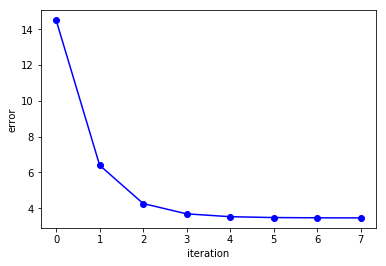

In [18]:
theta = npa([1.,1.])
gradient_descent(gradient, rss, theta,
                 .2, D, .01, 10)

## From regression to classification

**Does our error function make sense?**


iteration 1  
truth=-1  prediction=0 error=1  
truth=1  prediction=-0.8 error=3.24  
**truth=-1  prediction=-1.6 error=0.36**

<br><br>

The above assumes that the output variable $y_i$ is a real number. Thus, this is a model of <span>**regression**</span>.  

When $y$ is disrete, the problem is one of <span>**classification**</span>.  

<br>
Recall our three criterion for the function:
1. $0 \le f(y, \vec{x}) \le 1$  : values are between 0 and 1
2. $\sum_{y_i} f(y_i, \vec{x}) = 1$  : values sum to one for all possible classes
3. If $f(y_i, \vec{x}) > f(y_j, \vec{x})$, then it is more likely that $\vec{x}$ is of class $i$ than of class $j$

<br>
We have satisfied 3 (mostly), but not 1 or 2.

<br><br>

The way around this is to change our model. Rather than regression, we need classification. We can do this by passing the dot product $x_i \cdot \theta$ through a “squashing function” (the **logistic function**) that ensures its value is always between 0 and 1: 

$$f(\vec{x}_i, \vec{\theta}) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

This is called **logistic regression.**


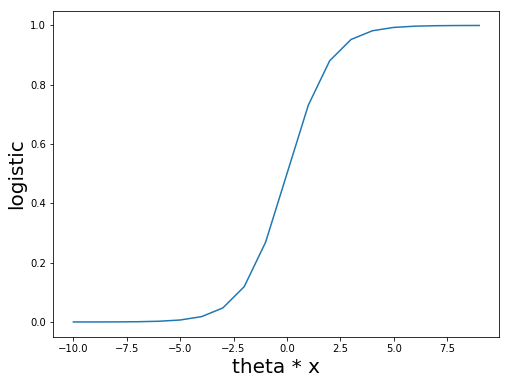

In [13]:
from math import exp
def logistic(x, theta):
    return 1 / (1 + exp(-f(x, theta)))
    
x = npa([1])

plt.figure(figsize=(8,6))
plt.plot(range(-10, 10), [logistic(x, theta) for theta in range(-10, 10)])
plt.xlabel('theta * x', size=20)
plt.ylabel('logistic', size=20)
plt.show()

Because $f(x_i, \vec{\theta})$ will always be between 0 and 1, and will sum to one for both classes, we have the right to call this a <span>**probability**</span> $p(y_i=1|\vec{x}_i)$.  

$$f(\vec{x}_i) = p(y_i=1|\vec{x}_i) = \frac{1}{1 + e^{-\vec{x}_i \cdot \vec{\theta}}}$$

and, for binary classification, the probability of a negative example:

$$
p(y_i=-1|\vec{x}_i) = 1 - p(y_i=1|\vec{x}_i)
$$

with some algebra, it turns out that:

$$
p(y_i=-1|\vec{x}_i) = \frac{1}{1 + e^{\vec{x}_i \cdot \vec{\theta}}}
$$

Because of this, if $y_i \in \{-1, 1\}$, we can write:

$$
p(y_i|\vec{x}_i) =  \frac{1}{1 + e^{-y_i \vec{x}_i \cdot \vec{\theta}}}
$$

**What is a good error function for logistic regression?**

We can now rephrase our learning objective as maximizing the <span>*joint probability of the true labels for all training instances.*</span>  

Since we assume each instance is drawn independently, we can write this joint probability as a product of individual probabilities: 

$$p(y_1 \ldots y_n|\vec{x}_1 \ldots \vec{x}_n) = p(y_1|\vec{x}_n) * p(y_2|\vec{x}_2) * \ldots * p(y_n|\vec{x}_n) = \prod_{i=1}^{n}p(y_i|\vec{x}_i)$$

Because we’re used to minimizing functions using gradient descent, rather than maximizing the probability, we can instead minimize the negative probability. This is our new error function: 

$$
E(D, h) = - \prod_{i=1}^{n}p(y_i|x_i)
$$

Note that this is very similar to RSS, but by using probabilities, we ensure that the output for each instance is always between 0 and 1.

<br><br>

Following our learning recipe, our next step is to minimize $E(D,h)$ using gradient descent.  

Computing the gradient of $E(D,h)$ in its current form is rather hard. So, we can simply transform it to something that’s easier to take the gradient of: 

$$E(D,h) = - \ln \prod_{i=1}^n  p(y_i|\vec{x}_i) = -\sum_i \ln p(y_i|\vec{x}_i)$$

This is called the <span>**negative log likelihood**</span>. It turns out that minimizing $f(x)$ or $\ln f(x)$ results in the same answer, so we can make this transformation without affecting our final solution.


In [14]:
from math import log

def nll(theta, D):
    total = 0
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        print('truth=%g  pr(true label)=%g' % 
              (yi, pred))
        total += log(pred)
    return -total


Now we’re ready to calculate the gradient with respect to one parameter $\theta_j$:

$$
\begin{aligned}
\frac{\partial E(D,f)}{\partial \theta_j} & = & \frac{\partial}{\partial \theta_j}- \ln \prod_i \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \\
& = &  \frac{\partial}{\partial \theta_j}-  \sum_i \ln \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{(by definition of log of products)}\\
& = &  -  \sum_i 1 + e^{-y_i x_i \cdot \theta} \frac{\partial}{\partial \theta_j} \frac{1}{1 + e^{-y_i x_i \cdot \theta}} \quad  \hbox{  (by }\frac{d}{dx}\ln(f(x)) = \frac{1}{f(x)} \frac{d}{dx}f(x) ) \\
& = &  -  \sum_i (1 + e^{-y_i x_i \cdot \theta})\Big(\frac{-y_ix_{ij} e^{-y_ix_i \cdot \theta}}{(1 + e^{-y_ix_i\cdot \theta})^2}\Big) \quad \hbox{    (by quotient and chain rules) }\\
& = & - \sum_i \frac{-y_i x_{ij} e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} \quad \hbox{     (by algebra) }\\
& = & \sum_i y_i x_{ij} (1 - p(y_i | x_i)) \quad \Big( \hbox{by }\frac{e^{-y_i x_i \cdot \theta}}{1 + e^{-y_i x_i \cdot \theta}} = 1 - p(y_i|x_i) \Big)
\end{aligned}
$$

Thus, the final logistic regression update is: 

$$
\theta_j^{t+1} \leftarrow \theta_j^{t} + \eta \sum_i y_i x_{ij}(1-p(y_i|\vec{x}_i))
$$



In [15]:
def gradient_logistic(theta, D):
    result = np.zeros(len(theta), dtype=np.float64)
    for xi, yi in D:
        pred = logistic(xi, theta) if yi==1 else 1-logistic(xi, theta)
        error = yi * (1-pred)
        for j, xij in enumerate(xi):
            result[j] -= error * xij
    return result

truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.731059
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.268941
truth=1  pr(true label)=0.880797
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.268941


iteration 1
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.687735
truth=-1  pr(true label)=0.174768
truth=-1  pr(true label)=0.174768
truth=-1  pr(true label)=0.312265
truth=1  pr(true label)=0.825232
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.31807
old error=8.70686   new error=7.75071  theta=[0.78954916 0.76265502]




iteration 2
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.64667
truth=-1  pr(true label)=0.240247
truth=-1  pr(true label)=0.240247
truth=-1  pr(true label)=0.35333
truth=1  pr(true label)=0.759753
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.366586
old error=7.75071   new error=6.99303  theta=[0.6044327  0.54689247]




iteration 3
truth=-1  pr(true label)=0.5
truth=1  pr(t

array([-0.05346604, -0.70385601])

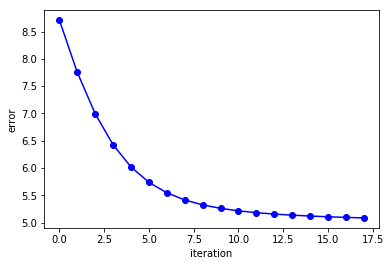

In [16]:
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta, 
                 .1, D, .01, 50)

truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.731059
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.119203
truth=-1  pr(true label)=0.268941
truth=1  pr(true label)=0.880797
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.268941


iteration 1
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.248896
truth=-1  pr(true label)=0.922582
truth=-1  pr(true label)=0.922582
truth=-1  pr(true label)=0.751104
truth=1  pr(true label)=0.0774179
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.797937
old error=8.70686   new error=6.00865  theta=[-1.10450839 -1.37344981]




iteration 2
truth=-1  pr(true label)=0.5
truth=1  pr(true label)=0.541267
truth=-1  pr(true label)=0.655278
truth=-1  pr(true label)=0.655278
truth=-1  pr(true label)=0.458733
truth=1  pr(true label)=0.344722
truth=1  pr(true label)=0.5
truth=-1  pr(true label)=0.691633
old error=6.00865   new error=5.05853  theta=[ 0.16544566 -0.80776659]




iteration 3
truth=-1  pr(true label)=0.5
truth

array([ 0.24877701, -1.27167751])

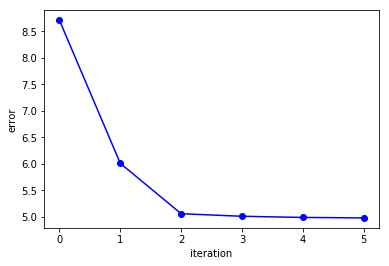

In [17]:
# What if learning is large?
theta = npa([1.,1.])
gradient_descent(gradient_logistic, nll, theta,
                 1, D, .01, 50)
# In this case, we converge in fewer iterations.
# For larger examples, we may have issues of stepping over the minimum.